<a href="https://colab.research.google.com/github/dongxiangtranslationproject/dongxiangtranslationproject.github.io/blob/main/NLLB_training(Dongxiang_%3E_Chinese).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentence Import and Formatting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re
import pandas as pd

with open('/content/drive/MyDrive/东乡语366句会话句 少数民族语汉英日俄对照.txt', 'r',encoding="gbk") as f:
    lines = f.readlines()

sentence1 = list()
for line in lines:
  if line.strip() != '':
    sentence1.append(line.rstrip('\n'))

In [ ]:
def cn_to_en_punctuation(text):
    punct = {
        '，': ',',
        '。': '.',
        '！': '!',
        '？': '?',
        '；': ';',
        '：': ':'
    }
    for cn, en in punct.items():
        text = text.replace(cn, en)
    return text

def en_to_cn_punctuation(text):
    punct = {
        ',': '，',
        '.': '。',
        '!': '！',
        '?': '？',
        ';': '；',
        ':': '：'
    }
    for en, cn in punct.items():
        text = text.replace(en, cn)
    return text

dongxiang = list()
chinese = list()
english = list()
for i, line in enumerate(sentence1):
  if i % 3 == 0:
    line = re.sub(r'^\d+\.\s*', '', line)
    line = re.sub(r'\s+', ' ', line.strip())
    line = cn_to_en_punctuation(line)
    if not line.endswith('.'):
      line += '.'
    dongxiang.append(line)

  elif i % 3 == 1:
    line = re.sub(r'\s+', ' ', line.strip())
    line = en_to_cn_punctuation(line)
    if not re.search(r'[。！？]$', line):
        line += '。'
    chinese.append(line)

  elif i % 3 == 2:
    line = re.sub(r'\s+', ' ', line.strip())
    line = cn_to_en_punctuation(line)
    if not line.endswith('.'):
        line += '.'
    english.append(line)

df = pd.DataFrame({
    'Dongxiang': dongxiang,
    'Chinese': chinese,
    'English': english
})

In [ ]:
df = df.loc[:, "Dongxiang":"Chinese"]
display(df)

,Dongxiang,Chinese
0,chi gao nu?.,你好吗？
1,gao wo na!.,我很好！
2,chini beye gao wo nu?.,你身体好吗？
3,oluna wo.,还可以！
4,mini beye hende gao wi.,我身体不太好。
...,...,...
362,bi nieda ende irene.,我第 一 次来这里。
363,endeni ula usu hudu saigan.,这里的山水真美。
364,zhiao ende ezegan fenzhin shia?pian zhauyiwo.,弟弟在这里拍了许多风景照。
365,bi zhoni imutu saiganni ula usu uzhesen wi.,我真没有见过如此美丽的山水。


The book *Dongxiang 366 Conversational Sentence* (2014, ISBN: 9787509753330) provides a high-quality
Dongxiang-Chinese-English parallel corpus. It is worth noting that the Latin-based Dongxiang writing
system is still underdeveloped and remains inconsistent. We did not utilize the *Brief Grammar of
the Dongxiang Language* published in the 1980s [东乡语简志 on Google Books](https://books.google.com.tw/books/about/东乡语简志.html?id=TDtsAAAAIAAJ&redir_esc=y).

Related issues are discussed in detail in the README.md file.

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/df_interior.csv')
df2 = df2.loc[:, "Dongxiang":"Chinese"]

In [ ]:
df2

,Dongxiang,Chinese
0,Tom Mary se undu wo,汤姆比玛丽高
1,Ene mutun giese undu,这树比房子高
2,ada ni kieliesan ni bi man jila wo,爸爸说的我全都记住了
3,?osun ni achisan kun kharei zhi ire wo,锄草的人回来了
4,beijing de sao zho,住在北京
...,...,...
1133,"sungode nie ghazha tareisan kun waine ,nie kun...",一天，一只跑得飞快的野兔撞在了树桩上
1134,"Nie udu de, nie holuzhi ghujin ni taolei nenie...",兔子把脖子扭断死了
1135,taolei ghizhigvei ne mushigvei ciragvadene fug...,于是，农民便放下他的农具守在树桩子旁边，希望能再抓到一只兔子
1136,ingiesene nie ghazha tareisan kun ghazha tarei...,但野兔再也没有来


These sentences are sourced from internal resources of the local government.

In [ ]:
a = pd.concat([df2, df] * 9, ignore_index=True)

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/final_translation.csv")

In [ ]:
df3_limited = df3.groupby("Chinese", group_keys=False).head(2)

In [ ]:
df3_limited = df3_limited.loc[:, ["Dongxiang_Expanded","Chinese"]]
df3_limited["Dongxiang"] = df3_limited["Dongxiang_Expanded"]
df3_limited = df3_limited.loc[:, ["Dongxiang","Chinese"]]

In [ ]:
df3_limited

,Dongxiang,Chinese
0,egven nie ni zhin shini bibi agi,她每年买一辆新车。
1,tere nie ni hon shini chezi taran jila,她每年买一辆新车。
10,egvesila ene beye xinqi ijiekui towo gie baza ...,他们在星期六在市场买杂货。
11,egvesila ende dolon ijiewuni towo gie baza dag...,他们在星期六在市场买杂货。
20,tere nie ni yefiin kidabu wantu taran jila,他每个月在网上买书。
...,...,...
117627,enela chuabao zuzu,他们典当了吉他。
117630,niere hhenugvun tororo zuzu,约翰典当了他的戒指。
117631,niere hhenugvun ghonghon tungulie zuzu,约翰典当了他的戒指。
117633,anei shoukua zuzu,玛丽典当了手镯。


These sentences are artificially created.

In [ ]:
df_train = pd.concat([df3_limited, a],ignore_index= True)

In [ ]:
print(f"Train: {len(df_train)} rows")

Train: 42873 rows


# Divide test, validation, train sets

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_temp = train_test_split(
    df_train,
    test_size=0.0001,
    random_state=42,
    shuffle=True
)

df_val, df_test = train_test_split(
    df_temp,
    test_size=0.01,
    random_state=42,
    shuffle=True
)


print(f"Train: {len(df_train)} rows")
print(f"Val:   {len(df_val)} rows")
print(f"Test:  {len(df_test)} rows")


Train: 42868 rows
Val:   4 rows
Test:  1 rows


# Tokenize

In [ ]:
from transformers import NllbTokenizer
from tqdm.auto import tqdm, trange
import re
tokenizer = NllbTokenizer.from_pretrained('facebook/nllb-200-distilled-600M')
def word_tokenize(text):
    # a very naive word tokenizer for Dongxiang, which uses English Alphabet
    return re.findall(r'(\w+|[^\w\s])', text)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
smpl = df_train.iloc[:101, :].copy()
smpl["Dongxiang_toks"], smpl["Dongxiang_words"] = zip(
    *smpl["Dongxiang"].map(lambda x: (tokenizer.tokenize(x), word_tokenize(x)))
)

In [ ]:
smpl.head(10)

,Dongxiang,Chinese,Dongxiang_toks,Dongxiang_words
6231,egvesila waine wilie gie ene nie ene magva mel...,他们今天早上在办公室采访了前经理。,"[▁eg, ves, ila, ▁wa, ine, ▁wili, e, ▁gie, ▁ene...","[egvesila, waine, wilie, gie, ene, nie, ene, m..."
7324,chanzi nie ni niudu kie ganshui yegvuchi,工厂每天生产含钢产品。,"[▁chan, zi, ▁nie, ▁ni, ▁ni, udu, ▁kie, ▁g, ans...","[chanzi, nie, ni, niudu, kie, ganshui, yegvuchi]"
7892,hhe towo gie wilie gie kielien ghuai ghodeizhi...,他在工作中完全支持这项倡议。,"[▁h, he, ▁to, wo, ▁gie, ▁wili, e, ▁gie, ▁kie, ...","[hhe, towo, gie, wilie, gie, kielien, ghuai, g..."
13734,ishujia waine hhali xienji guzha lieliinzi zhiwu,艺术家在画廊中把雕塑摆得歪歪斜斜。,"[▁is, hu, jia, ▁wa, ine, ▁h, hali, ▁xi, enji, ...","[ishujia, waine, hhali, xienji, guzha, lieliin..."
4707,ghazha tarei ende asun qiezhe ciniu fugietu ho...,农民在牧场上饲养牛。,"[▁gha, zha, ▁tare, i, ▁ende, ▁as, un, ▁q, iez,...","[ghazha, tarei, ende, asun, qiezhe, ciniu, fug..."
27039,zhinche jienxin hharamu,政策禁止使用手机。,"[▁z, hin, che, ▁jien, xin, ▁h, har, amu]","[zhinche, jienxin, hharamu]"
31163,kien shanxiyuen de saozho,有谁在上西园住着,"[▁kien, ▁shan, xi, yu, en, ▁de, ▁sao, z, ho]","[kien, shanxiyuen, de, saozho]"
19620,hhe chada yenzi tiigha ho khireigva,他把鸡舍放在花园附近。,"[▁h, he, ▁ch, ada, ▁yen, zi, ▁ti, ig, ha, ▁ho,...","[hhe, chada, yenzi, tiigha, ho, khireigva]"
27270,hhe shu namure,她把书放在架子上。,"[▁h, he, ▁shu, ▁nam, ure]","[hhe, shu, namure]"
8617,egven fuzhugvudu egven zharun hhe dosi bierei ...,她昨天把她的同父异母兄弟介绍给了她的朋友。,"[▁eg, ven, ▁fu, z, hug, v, udu, ▁eg, ven, ▁z, ...","[egven, fuzhugvudu, egven, zharun, hhe, dosi, ..."


In [ ]:
stats = pd.DataFrame({
    "Dongxiang_toks_len": [len(x) for x in smpl["Dongxiang_toks"]],
    "Dongxiang_words_len": [len(x) for x in smpl["Dongxiang_words"]]
}).describe()
display(stats)

,Dongxiang_toks_len,Dongxiang_words_len
count,101.000000,101.000000
mean,13.059406,6.613861
std,5.818628,2.838909
min,4.000000,2.000000
25%,8.000000,4.000000
50%,12.000000,7.000000
75%,17.000000,8.000000
max,28.000000,15.000000


| Metric | Meaning |
|--------|---------|
| count  | Number of samples (here, 101 rows of data) |
| mean   | Average sentence length (tokens ≈ 10.95, words ≈ 7.02) |
| std    | Standard deviation, indicating how dispersed the lengths are (tokens ≈ ±4.01, words ≈ ±2.02) |
| min    | Shortest sentence length (tokens = 3, words = 3) |
| 25%    | 25th percentile — 25% of sentences are ≤ this length (tokens ≤ 8, words ≤ 6) |
| 50%    | Median — 50% of sentences are ≤ this length (tokens = 10, words = 6) |
| 75%    | 75th percentile — 75% of sentences are ≤ this length (tokens ≤ 13, words ≤ 8) |
| max    | Longest sentence length (tokens = 23, words = 12) |


In [ ]:
print(f'average token per word:{10.950495/7.0198}')

average token per word:1.5599440154990172


In [ ]:
print(tokenizer.unk_token, tokenizer.unk_token_id)

<unk> 3


In [ ]:
unk_count = sum(x.count(3) for x in smpl["Dongxiang_toks"])
print(f"Total <unk> tokens: {unk_count}")

Total <unk> tokens: 0


The average token-to-word ratio for Dongxiang is approximately 1.5, which indicates that the tokenizer is able to recognize a substantial portion of words in the corpus without excessive segmentation. Moreover, there is no unknown word. This indicates that despite Dongxiang not being included in the model's official list of supported languages, the tokenizer can be used directly without the need to expand its vocabulary. However, after tokenization, language tags must be added before feeding the text into the model for translation.

# Add a new language tag

In [ ]:
print(len(tokenizer))

256204


In [ ]:
def fix_tokenizer(tokenizer, new_lang: str) -> int:
    tokenizer.add_special_tokens({"additional_special_tokens": [new_lang]})
    new_id = tokenizer.convert_tokens_to_ids(new_lang)
    return new_id

In [ ]:
fix_tokenizer(tokenizer,"sce_Latn")

256204

In [ ]:
print(tokenizer.convert_ids_to_tokens([256203, 256204]))
print(tokenizer.convert_tokens_to_ids(['<mask>','sce_Latn']))

['<mask>', 'sce_Latn']
[256203, 256204]


The ISO 639-3 code for the Dongxiang language is **sce**.
Following NLLB's naming convention, we name it as: sce_Latn.

# Update embedding layer

In [ ]:
from transformers import AutoModelForSeq2SeqLM
import torch

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/nllb-200-distilled-600M")
model.resize_token_embeddings(len(tokenizer))
new_id = fix_tokenizer(tokenizer, "sce_Latn")
embed_dim = model.model.shared.weight.size(1)
model.model.shared.weight.data[new_id] = torch.randn(embed_dim) * 0.02

In this experiment, we added a new language tag, sce_Latn, to the tokenizer and assigned it a new row in the model's embedding matrix. Since Dongxiang (sce_Latn) was not included in the NLLB pretraining, and its neighboring languages (such as Mongolian) use entirely different writing systems, directly copying embeddings from Mongolian or other non-Latin script languages fails to provide meaningful semantic priors. Especially, in our baseline, we tried using such embeddings from "neighboring languages with different scripts" without any fine-tuning, and the resulting BLEU were close to 0. This suggests that misleading priors may do more harm than good. In such cases, initializing with random embeddings may offer a more conservative approach.

# Prepare for training

In [ ]:
import gc
import random
import numpy as np
import torch
from tqdm.notebook import tqdm, trange
from transformers.optimization import Adafactor
from transformers import get_constant_schedule_with_warmup

def cleanup():
    """Try to free GPU memory"""
    gc.collect()
    torch.cuda.empty_cache()

cleanup()

In [ ]:
model.cuda()

M2M100ForConditionalGeneration(
  (model): M2M100Model(
    (shared): M2M100ScaledWordEmbedding(256205, 1024, padding_idx=1)
    (encoder): M2M100Encoder(
      (embed_tokens): M2M100ScaledWordEmbedding(256205, 1024, padding_idx=1)
      (embed_positions): M2M100SinusoidalPositionalEmbedding()
      (layers): ModuleList(
        (0-11): 12 x M2M100EncoderLayer(
          (self_attn): M2M100Attention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
       

In [ ]:
optimizer = Adafactor(
    [p for p in model.parameters() if p.requires_grad],
    scale_parameter=False,
    relative_step=False,
    lr=1e-4,
    clip_threshold=1.0,
    weight_decay=1e-3,
)

In [ ]:
batch_size = 64
max_length = 128
training_steps = 8000
warmup_steps = 500

In [ ]:
losses = []
scheduler = get_constant_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps)

| Parameter          | Value                               | Description                                                                                  |
|--------------------|-------------------------------------|----------------------------------------------------------------------------------------------|
| `batch_size`       | `64`                                | Number of sample pairs in each training step.<br>Larger batches increase GPU usage but improve stability; smaller batches train faster but may fluctuate. |
| `max_length`       | `128`                               | Maximum number of tokens per sentence after tokenization.<br>Longer sequences are truncated; shorter ones are padded. |
| `training_steps`   | `8000`                             | Total number of training steps. One batch is processed per step.                            |
| `warmup_steps`     | `500`                              | First 1000 steps are warm-up phase where learning rate increases from 0 to the target value.<br>This helps stabilize early training. |
| `learning_rate`    | `1e-4`                              | Learning rate (constant after warm-up).<br>Too high may cause divergence; too low slows convergence. |
| `optimizer`        | `Adafactor`                         | Memory-efficient optimizer suitable for large models.<br>Particularly effective for large embedding tables. |
| `scale_parameter`  | `False`                             | Disables Adafactor's default learning rate scaling. Uses manually set learning rate instead.          |
| `relative_step`    | `False`                             | Disables Adafactor's dynamic step size. Uses fixed learning rate.                           |
| `clip_threshold`   | `1.0`                               | Gradient clipping threshold to prevent gradient explosion. Values above this are clipped.    |
| `weight_decay`     | `1e-3`                              | L2 regularization strength to reduce overfitting.                                            |
| `scheduler`        | `get_constant_schedule_with_warmup` | A learning rate scheduler that linearly increases during `warmup_steps`, then stays constant.<br>Helps ensure a smooth training process. |


In [ ]:
def get_all_batches(data = df_train, batch_size=16):
    l1, lang1 = 'Dongxiang', 'sce_Latn'
    l2, lang2 = 'Chinese', 'zho_Hans'

    for start in range(0, len(data), batch_size):
        end = start + batch_size
        batch = data.iloc[start:end]
        xx = batch[l1].tolist()
        yy = batch[l2].tolist()
        yield xx, yy, lang1, lang2
gen = get_all_batches()
print(next(gen))

(['egvesila waine wilie gie ene nie ene magva melieshidaku gonji giinxinla', 'chanzi nie ni niudu kie ganshui yegvuchi', 'hhe towo gie wilie gie kielien ghuai ghodeizhi fuyi', 'ishujia waine hhali xienji guzha lieliinzi zhiwu', 'ghazha tarei ende asun qiezhe ciniu fugietu howoer fugiedagva', 'zhinche jienxin hharamu', 'kien shanxiyuen de saozho', 'hhe chada yenzi tiigha ho khireigva', 'hhe shu namure', 'egven fuzhugvudu egven zharun hhe dosi bierei kielie', 'he puse hudu zhalao.', 'tere waine zowo ene nie udu khuina longozi ijiu olu', 'wiliechi fuzhugvudu hoche sazhala kuru', 'surugvachin ende zhuma uda guishun gie jianxi gie', 'enela waine hhelagvun banji lonsonda aghili jianjiugva', 'Gayijiao Ghuala'], ['他们今天早上在办公室采访了前经理。', '工厂每天生产含钢产品。', '他在工作中完全支持这项倡议。', '艺术家在画廊中把雕塑摆得歪歪斜斜。', '农民在牧场上饲养牛。', '政策禁止使用手机。', '有谁在上西园住着', '他把鸡舍放在花园附近。', '她把书放在架子上。', '她昨天把她的同父异母兄弟介绍给了她的朋友。', '他还很年轻。', '他今天下午在厨房准备了火锅。', '工人们昨天参加了培训课程。', '老师在星期五接受迟交。', '他们在招聘过程中重视智力。', '从前有一个人'], 'sce_Latn', 'zho_Hans')


lang1 = "sce_Latn" (Dongxiang in Latin script) and lang2 = zho_Hans" (Chinese), the direction is Dongxiang → Chinese.



#Train

In [ ]:
MODEL_SAVE_PATH = "/content/drive/MyDrive/my_nllb_DC_model"

In [ ]:
@torch.no_grad()
def get_val_loss(model, tokenizer, df_val, batch_size=16, max_length=128):
    model.eval()
    total_loss = 0
    n = 0

    for i in range(0, len(df_val), batch_size):
        batch = df_val.iloc[i:i+batch_size]
        xx = batch["Dongxiang"].tolist()
        yy = batch["Chinese"].tolist()

        tokenizer.src_lang = "sce_Latn"
        x = tokenizer(xx, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)

        tokenizer.src_lang = "zho_Hans"
        y = tokenizer(yy, return_tensors='pt', padding=True, truncation=True, max_length=max_length).to(model.device)
        y.input_ids[y.input_ids == tokenizer.pad_token_id] = -100

        loss = model(**x, labels=y.input_ids).loss
        total_loss += loss.item() * len(xx)
        n += len(xx)

    model.train()
    return total_loss / n

**Early stopping parameters**

* patience

Meaning: The number of consecutive times the model is allowed not to improve on the validation set.

* min_delta

Meaning: The minimum threshold for improvement.

In [ ]:
patience = 10
min_delta = 1e-3
best_val_loss = float("inf")
best_step = -1
patience_counter = 0
model.train()

x, y, loss = None, None, None
cleanup()

In [ ]:
tq = trange(len(losses), training_steps)
df_shuffled = df_train.sample(frac=1).reset_index(drop=True)
gen = get_all_batches(df_shuffled, batch_size=batch_size)

for i in tq:
    try:
        xx, yy, lang1, lang2 = next(gen)
    except StopIteration:
        df_shuffled = df_train.sample(frac=1).reset_index(drop=True)
        gen = get_all_batches(df_shuffled, batch_size=batch_size)
        xx, yy, lang1, lang2 = next(gen)

    try:
        tokenizer.src_lang = lang1
        x = tokenizer(xx, return_tensors='pt', padding=True, truncation=True,
                      max_length=max_length).to(model.device)
        tokenizer.src_lang = lang2
        y = tokenizer(yy, return_tensors='pt', padding=True, truncation=True,
                      max_length=max_length).to(model.device)
        y.input_ids[y.input_ids == tokenizer.pad_token_id] = -100

        loss = model(**x, labels=y.input_ids).loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        losses.append(loss.item())

        optimizer.step()
        optimizer.zero_grad(set_to_none=True)
        scheduler.step()

    except RuntimeError as e:
        optimizer.zero_grad(set_to_none=True)
        x, y, loss = None, None, None
        cleanup()
        print('error', max(len(str(s)) for s in xx + yy), e)
        continue

    if i % 1000 == 0:
        val_loss = get_val_loss(model, tokenizer, df_val)
        print(f"Validation loss at step {i}: {val_loss:.4f}")
        model.train()

        if best_val_loss - val_loss > min_delta:
            best_val_loss = val_loss
            best_step = i
            patience_counter = 0
            model.save_pretrained(MODEL_SAVE_PATH)
            tokenizer.save_pretrained(MODEL_SAVE_PATH)
        else:
            patience_counter += 1
            print(f"No improvement. Patience counter: {patience_counter}/{patience}")
            if patience_counter >= patience:
                print(f"Early stopping triggered at step {i}. Best step: {best_step}, Best val loss: {best_val_loss:.4f}")
                break

  0%|          | 0/8000 [00:00<?, ?it/s]

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.58.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Validation loss at step 0: 5.4919


/usr/local/lib/python3.12/dist-packages/transformers/modeling_utils.py:3917: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 200}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


Validation loss at step 1000: 1.5674
Validation loss at step 2000: 0.8662
Validation loss at step 3000: 0.5842
Validation loss at step 4000: 0.3169
Validation loss at step 5000: 0.3015
Validation loss at step 6000: 0.2660
Validation loss at step 7000: 0.2874
No improvement. Patience counter: 1/10


Note that we use token-level cross-entropy as the loss function, which implicitly assumes that the reference translation is the only correct answer and must be aligned word by word. As a result, when the model’s prediction differs from the reference at any position, it is penalized, even if the two translations are semantically equivalent.

For example, in Chinese, “我喜欢你” can be translated into English as either “I like you” or “I love you.” While human readers can easily recognize that “like” and “love” are interchangeable in this context, the loss function will still penalize “I love you” if the parallel corpus specifies “I like you” as the reference.

This illustrates that token-level cross-entropy is less tolerant of synonyms, paraphrases, or variations in sentence length, creating a gap between the training signal and human semantic judgment. More advanced alternatives, such as Minimum Risk Training (MRT) and Reinforcement Learning (RL), can directly optimize sequence-level metrics like BLEU or chrF. Nevertheless, in practice, we continue to use cross-entropy due to its simplicity and efficiency.

# Translation example

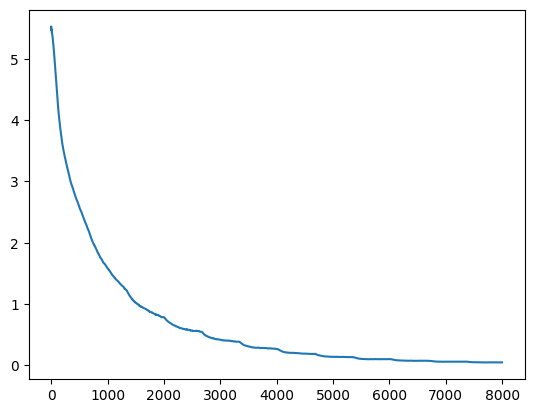

In [ ]:
pd.Series(losses).ewm(100).mean().plot();

In [ ]:
def translate(text, src_lang, tgt_lang,
              a=16, b=1.5, max_input_length=1024, **kwargs):
    tokenizer.src_lang = src_lang
    tokenizer.tgt_lang = tgt_lang

    inputs = tokenizer(text, return_tensors='pt', padding=True,
                       truncation=True, max_length=max_input_length)

    result = model.generate(
        **inputs.to(model.device),
        forced_bos_token_id=tokenizer.convert_tokens_to_ids(tgt_lang),
        max_new_tokens=int(a + b * inputs.input_ids.shape[1]),
        **kwargs
    )

    outputs = tokenizer.batch_decode(result, skip_special_tokens=True)
    clean_outputs = [(o[len(tgt_lang):].lstrip() if o.startswith(tgt_lang) else o)
                     for o in outputs]
    return clean_outputs

In [ ]:
def get_batch_pairs(batch_size=1, data=df_val):
    l1, lang1 = 'Dongxiang', 'sce_Latn'
    l2, lang2 = 'Chinese', 'zho_Hans'
    xx, yy = [], []
    for _ in range(batch_size):
        item = data.iloc[random.randint(0, len(data)-1)]
        xx.append(item[l1])
        yy.append(item[l2])

    return xx, yy, lang1, lang2

In [ ]:
xx, yy, lang1, lang2 = get_batch_pairs(batch_size=1, data=df_val)
print("Dongxiang:", xx)
print("Chinese:", yy)
pred = translate(xx, src_lang=lang1, tgt_lang=lang2,no_repeat_ngram_size=3, num_beams=5)
print("Translation:", pred)

Dongxiang: ['hhe waine inganla baonan gie zanzida zixigva']
Chinese: ['他在办公室仔细检查了报告。']
Translation: ['他在办公室仔细检查了报告。']


In [ ]:
!ls -alsh $MODEL_SAVE_PATH